In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks  import ModelCheckpoint, EarlyStopping

df = pd.read_csv('iris.csv', delimiter = ',')
df = df.sample(frac=1) #데이터를 섞어야할때 frac=1을 사용함
dataset = df.values

X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4]

labelE = LabelEncoder()
labelE.fit(Y)
y = labelE.transform(Y)
Y_encoded = tf.keras.utils.to_categorical(y)


model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

MODEL_DIR ='./model/iris'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)
modelpath="./model/iris/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X, Y_encoded, validation_split = 0.33, epochs = 3500, batch_size= 50, callbacks=[early_stopping_callback, checkpointer])

y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(5, 5))
plt.plot(x_len, y_vacc, 'o', c='red', markersize = 1, label = 'val_accuracy')
plt.plot(x_len, y_acc, 'o', c='blue', markersize = 1, label = 'accuracy')
plt.plot(x_len, y_vloss, 'o', c='black', markersize = 1, label = 'val_loss')
plt.plot(x_len, y_loss, 'o', c='pink', markersize = 1, label = 'loss')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 1.3516
Epoch 1: val_loss improved from inf to 1.26308, saving model to ./model/iris/01-1.2631.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.0067 - loss: 1.2703 - val_accuracy: 0.0000e+00 - val_loss: 1.2631
Epoch 2/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 1.2636
Epoch 2: val_loss improved from 1.26308 to 1.22525, saving model to ./model/iris/02-1.2252.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0067 - loss: 1.2196 - val_accuracy: 0.0200 - val_loss: 1.2252
Epoch 3/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 1.1137
Epoch 3: val_loss improved from 1.22525 to 1.19286, saving model to ./model/iris/03-1.1929.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0067 - loss: 1.1491 - val_accuracy: 0.0400 - val_loss: 1.1929
Epoch 4/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.1923
Epoch 4: val

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x1344efd80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 

KeyboardInterrupt



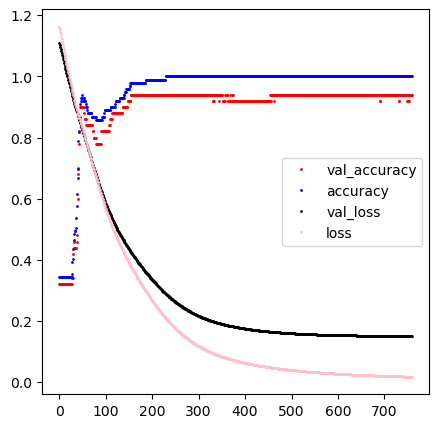

In [46]:
plt.figure(figsize=(5, 5))
plt.plot(x_len, y_vacc, 'o', c='red', markersize = 1, label = 'val_accuracy')
plt.plot(x_len, y_acc, 'o', c='blue', markersize = 1, label = 'accuracy')
plt.plot(x_len, y_vloss, 'o', c='black', markersize = 1, label = 'val_loss')
plt.plot(x_len, y_loss, 'o', c='pink', markersize = 1, label = 'loss')
plt.legend()
plt.show()

In [60]:
from tensorflow.keras.models import load_model
new_model = load_model("./model/iris/737-0.1515.keras")

new_x = np.array([[5.8, 2.8, 5.1, 2.4],[6.3, 2.2, 4.3 , 1.4],[5.5, 4.2, 1.4, 0.2],[7.3, 2.9, 6.3, 1.8],[5.5 , 3.4, 1.5, 0.2],[6.3, 3.3, 6.5 , 2.5],[5.1 , 3.5, 1.3, 0.3]])

new_y = new_model.predict(new_x)

# 예측된 확률 출력
print("예측된 확률:\n", new_y)

# 예측된 클래스 (가장 높은 확률의 인덱스)
predicted_classes = np.argmax(new_y, axis=1)
iris_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(new_y.shape[0]):
    index_no = new_y[i].argmax()
    print("Data %d : %s" %(i, iris_name[index_no]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
예측된 확률:
 [[7.7740744e-11 1.7193526e-04 9.9982798e-01]
 [2.7921642e-04 9.9179101e-01 7.9297815e-03]
 [9.9922657e-01 7.7343173e-04 3.1606950e-11]
 [3.0034761e-09 7.2827074e-03 9.9271727e-01]
 [9.9871016e-01 1.2898048e-03 1.7397654e-10]
 [4.3434570e-13 1.1838329e-05 9.9998820e-01]
 [9.9830902e-01 1.6909916e-03 4.2941126e-10]]
Data 0 : Iris-virginica
Data 1 : Iris-versicolor
Data 2 : Iris-setosa
Data 3 : Iris-virginica
Data 4 : Iris-setosa
Data 5 : Iris-virginica
Data 6 : Iris-setosa


--------------------------------------------------------
보스턴 하우징 - 정규화
-

/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_24589/3175903619.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


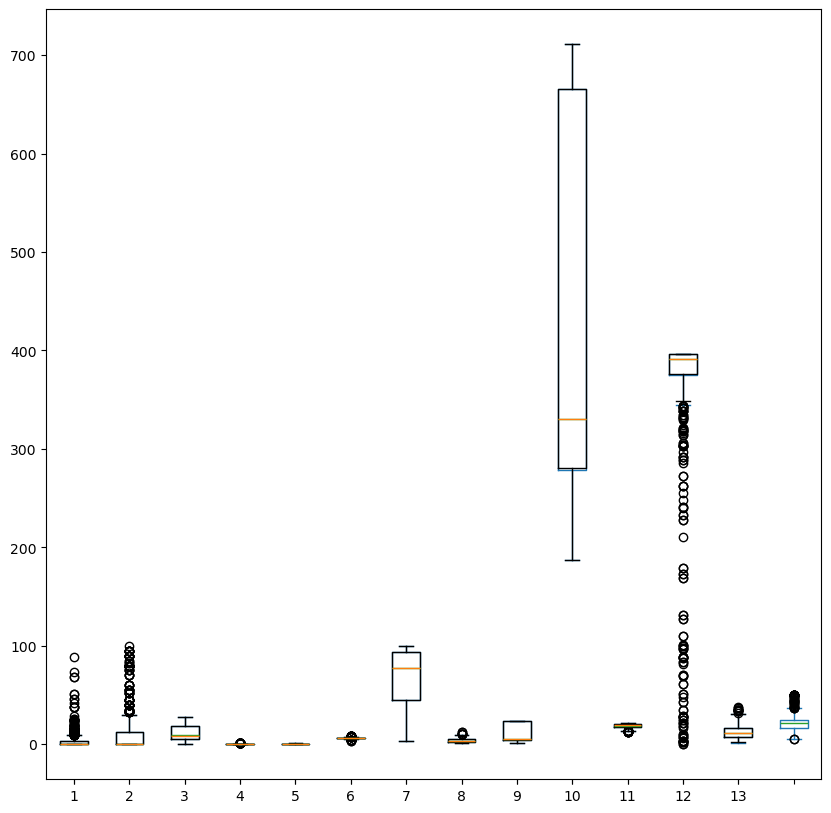

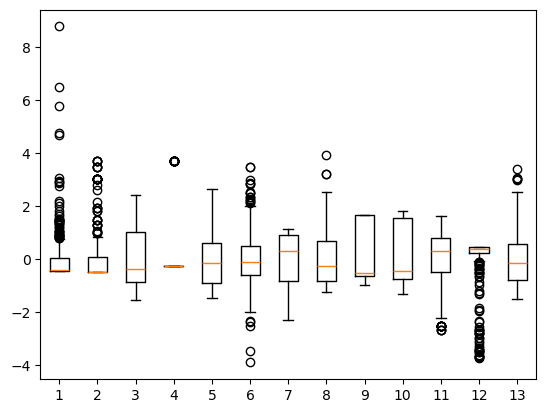

Epoch 1/5000


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 536.4185
Epoch 1: val_loss improved from inf to 547.36456, saving model to ./model/housing/01-561.3583.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 538.4137 - val_loss: 547.3646
Epoch 2/5000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 434.4590
Epoch 2: val_loss improved from 547.36456 to 522.92657, saving model to ./model/housing/02-537.9788.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 516.8919 - val_loss: 522.9266
Epoch 3/5000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 420.6402
Epoch 3: val_loss improved from 522.92657 to 491.43781, saving model to ./model/housing/03-510.3125.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 492.5863 - val_loss: 491.4378
Epoch 4/5000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 402.4195
Epoch 4: val_loss improved from 491.43781 to 450.71771, saving model to ./model/housing/04-474.7582.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 461.3564 - val_loss: 450.7177
Epoch 5

In [121]:
import pandas as pd
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
df = df.sample(frac=1)
dataset = df.values
x = dataset[:, 0:13]
y = dataset[:, 13]

df.plot.box(figsize=(10, 10))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

plt.boxplot(x_train)
plt.show()

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

plt.boxplot(x_train)
plt.show()


model = Sequential()
model.add(Dense(30, input_dim=13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR ='./model/housing'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 50)
modelpath="./model/housing/{epoch:02d}-{loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=5000, batch_size = 10, callbacks = [checkpointer, early_stopping_callback])

         loss  val_loss
147  5.794722  9.799009
148  5.763026  9.781013
149  5.747922  9.807527
150  5.711909  9.775970
151  5.691006  9.806984


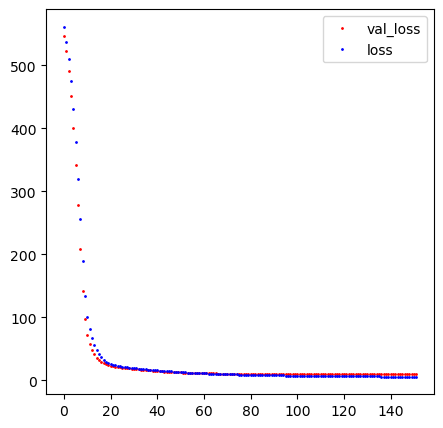

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
실제 가격: 19.4, 예상 가격: 19.977109909057617
실제 가격: 10.9, 예상 가격: 12.80030632019043
실제 가격: 34.7, 예상 가격: 30.61437225341797
실제 가격: 15.6, 예상 가격: 16.366262435913086
실제 가격: 22.6, 예상 가격: 24.545866012573242
실제 가격: 29.0, 예상 가격: 33.511024475097656
실제 가격: 23.8, 예상 가격: 21.21890640258789
실제 가격: 45.4, 예상 가격: 42.23303985595703
실제 가격: 50.0, 예상 가격: 47.699337005615234
실제 가격: 26.7, 예상 가격: 30.62351417541504


In [123]:
hist = pd.DataFrame(history.history)
print(hist.tail())

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.figure(figsize=(5, 5))
plt.plot(x_len, y_vloss, "o", c='red', markersize = 1, label='val_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize = 1, label='loss')
plt.legend()
plt.show()


y_predict = model.predict(x_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_predict[i]
    print(f"실제 가격: {label}, 예상 가격: {prediction}")


[[-6.43766667e-02  1.18333333e+01 -2.86777778e+00  0.00000000e+00
   4.66666667e-02  6.71111111e-02 -4.42222222e+00 -1.44376667e+00
  -2.22222222e+00  3.16666667e+01 -1.65555556e+00  2.29888889e+00
  -5.36888889e+00]
 [-4.33866667e-02 -6.16666667e+00  1.89222222e+00  0.00000000e+00
  -2.23333333e-02 -8.68888889e-02  9.27777778e+00 -5.66666667e-01
  -1.22222222e+00 -2.23333333e+01  8.44444444e-01  2.29888889e+00
  -1.20888889e+00]
 [-4.34066667e-02 -6.16666667e+00  1.89222222e+00  0.00000000e+00
  -2.23333333e-02  6.77111111e-01 -8.52222222e+00 -5.66666667e-01
  -1.22222222e+00 -2.23333333e+01  8.44444444e-01 -1.77111111e+00
  -6.31888889e+00]
 [-3.83266667e-02 -6.16666667e+00 -2.99777778e+00  0.00000000e+00
  -3.33333333e-02  4.90111111e-01 -2.38222222e+01  5.28433333e-01
  -2.22222222e-01 -4.23333333e+01  1.74444444e+00  2.88888889e-02
  -7.40888889e+00]
 [-1.64666667e-03 -6.16666667e+00 -2.99777778e+00  0.00000000e+00
  -3.33333333e-02  6.39111111e-01 -1.54222222e+01  5.28433333e-01


/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_24589/2410706658.py:21: RuntimeWarning: invalid value encountered in divide
  new_data /= std


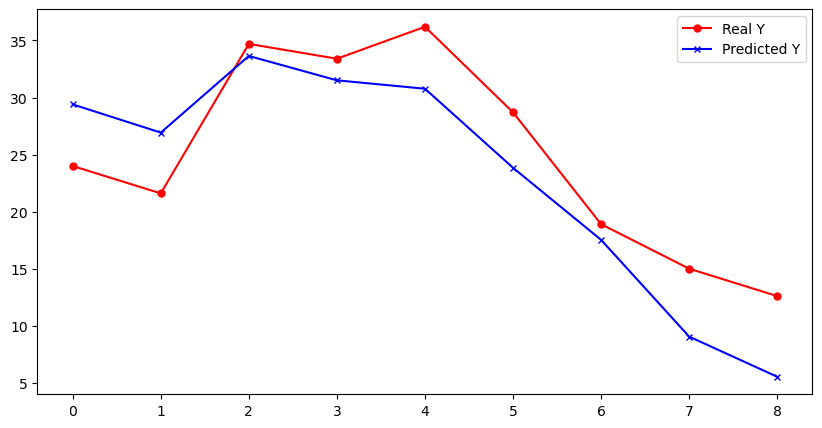

In [164]:
from tensorflow.keras.models import load_model

#new_model = load_model("./model/housing/233-18.2074.keras")
new_model = load_model("./model/housing/102-7.3578.keras")

new_data = np.array([
     [0.00632, 18.00, 2.310, 0, 0.5380, 6.5750, 65.20, 4.0900, 1, 296.0, 15.30, 396.90, 4.98],
     [0.02731, 0.00, 7.070, 0, 0.4690, 6.4210, 78.90, 4.9671, 2, 242.0, 17.80, 396.90, 9.14],
     [0.02729, 0.00, 7.070, 0, 0.4690, 7.1850, 61.10, 4.9671, 2, 242.0, 17.80, 392.83, 4.03],
     [0.03237, 0.00, 2.180, 0, 0.4580, 6.9980, 45.80, 6.0622, 3, 222.0, 18.70, 394.63, 2.94],
     [0.06905, 0.00, 2.180, 0, 0.4580, 7.1470, 54.20, 6.0622, 3, 222.0, 18.70, 396.90, 5.33],
     [0.02985, 0.00, 2.180, 0, 0.4580, 6.4300, 58.70, 6.0622, 3, 222.0, 18.70, 394.12, 5.21],
     [0.08829, 12.50, 7.870, 0, 0.5240, 6.0120, 66.60, 5.5605, 5, 311.0, 15.20, 395.60, 12.43],
     [0.14455, 12.50, 7.870, 0, 0.5240, 6.1720, 96.10, 5.9505, 5, 311.0, 15.20, 396.90, 19.15],
     [0.21124, 12.50, 7.870, 0, 0.5240, 5.6310, 100.00, 6.0821, 5, 311.0, 15.20, 386.63, 29.93]
])


new_data -= mean
print(new_data)
new_data /= std
print(new_data)

for i in range (len(new_data)):
    new_data[i][3] = 0
print(new_data)


new_y = new_model.predict(new_data).flatten()
print("예측된 값:\n", new_y)

real_y = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 18.9, 15.0, 12.6])
new_y = np.array(new_y)

plt.figure(figsize=(10, 5))
x_len = np.arange(len(new_data))
plt.plot(x_len, real_y, c="red", markersize=5, label='Real Y', marker = "o")
plt.plot(x_len, new_y, c="blue", markersize=5, label='Predicted Y', marker = "x")
plt.legend()
plt.show()